In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvaXovRHJvcGJveC9zdHVmZi9mb3Itb3RoZXJzL3RlYWNoaW5nL0hGSC9HS0kvMDUtZ2tpLXdlYnNpdGUvaW5jbHVkZQ=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/tmp/ipykernel_75407/1583724672.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1748365949.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1748365949.0, "/usr/lib/python3.10/codecs.py": 1748365949.0, "/usr/lib/python3.10/encodings/aliases.py": 1748365949.0, "/usr/lib/python3.10/encodings/__init__.py": 1748365949.0, "/usr/lib/python3.10/encodings/utf_8.py": 1748365949.0, "/usr/lib/python3.10/abc.py": 1748365949.0, "/usr/lib/python3.10/io.py": 1748365949.0, "/usr/lib/python3.10/stat.py": 1748365949.0, "/usr/lib/python3.10/_collections_abc.py": 1748365949.0, "/usr/lib/python3.10/genericpath.py": 1748365949.0, "/usr/lib/python3.10/posixpath.py": 1748365949.0, "/usr/lib/python3.10/os.py": 1748365949.0, "/usr/lib/python3.10/_sitebuiltins.py": 1748365949.0, "/usr/lib/python3.10/sitecustomize.py": 1648890259.0, "/usr/lib/python3.10/site.py": 1748365949.0, "/usr/lib/python3.10/warnings.py": 1748365949.0, "/usr/lib/python3.10/importlib/__init__.py": 1748365949.0, "/usr/lib/python3.10/importlib/machinery.py": 1748365

In [2]:
import keras as K
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-08-15 12:32:29.276860: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-15 12:32:29.282692: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-15 12:32:29.296505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755253949.323796   75407 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755253949.331613   75407 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755253949.356232   75407 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
mnist = K.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
y_train = K.utils.to_categorical(y_train)
y_test = K.utils.to_categorical(y_test)

In [5]:
model = K.models.Sequential()
model.add(K.layers.Flatten())
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.Dense(10, activation='softmax'))

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

2025-08-15 12:32:33.661662: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
history = model.fit(
    x_train,
    y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.3,
    verbose=2)

Epoch 1/30


329/329 - 4s - 12ms/step - accuracy: 0.8931 - loss: 0.3817 - val_accuracy: 0.9393 - val_loss: 0.2031


Epoch 2/30


329/329 - 2s - 7ms/step - accuracy: 0.9541 - loss: 0.1547 - val_accuracy: 0.9541 - val_loss: 0.1565


Epoch 3/30


329/329 - 2s - 7ms/step - accuracy: 0.9687 - loss: 0.1062 - val_accuracy: 0.9648 - val_loss: 0.1217


Epoch 4/30


329/329 - 2s - 6ms/step - accuracy: 0.9761 - loss: 0.0802 - val_accuracy: 0.9663 - val_loss: 0.1143


Epoch 5/30


329/329 - 2s - 7ms/step - accuracy: 0.9821 - loss: 0.0607 - val_accuracy: 0.9689 - val_loss: 0.1091


Epoch 6/30


329/329 - 2s - 6ms/step - accuracy: 0.9855 - loss: 0.0481 - val_accuracy: 0.9706 - val_loss: 0.1057


Epoch 7/30


329/329 - 2s - 7ms/step - accuracy: 0.9888 - loss: 0.0371 - val_accuracy: 0.9709 - val_loss: 0.1034


Epoch 8/30


329/329 - 2s - 6ms/step - accuracy: 0.9916 - loss: 0.0281 - val_accuracy: 0.9701 - val_loss: 0.1104


Epoch 9/30


329/329 - 2s - 7ms/step - accuracy: 0.9925 - loss: 0.0253 - val_accuracy: 0.9696 - val_loss: 0.1132


Epoch 10/30


329/329 - 2s - 7ms/step - accuracy: 0.9947 - loss: 0.0189 - val_accuracy: 0.9686 - val_loss: 0.1232


Epoch 11/30


329/329 - 2s - 7ms/step - accuracy: 0.9960 - loss: 0.0144 - val_accuracy: 0.9696 - val_loss: 0.1275


Epoch 12/30


329/329 - 2s - 7ms/step - accuracy: 0.9961 - loss: 0.0134 - val_accuracy: 0.9717 - val_loss: 0.1175


Epoch 13/30


329/329 - 2s - 7ms/step - accuracy: 0.9944 - loss: 0.0172 - val_accuracy: 0.9731 - val_loss: 0.1142


Epoch 14/30


329/329 - 2s - 7ms/step - accuracy: 0.9975 - loss: 0.0092 - val_accuracy: 0.9724 - val_loss: 0.1200


Epoch 15/30


329/329 - 2s - 6ms/step - accuracy: 0.9977 - loss: 0.0083 - val_accuracy: 0.9714 - val_loss: 0.1261


Epoch 16/30


329/329 - 2s - 7ms/step - accuracy: 0.9978 - loss: 0.0079 - val_accuracy: 0.9675 - val_loss: 0.1519


Epoch 17/30


329/329 - 2s - 7ms/step - accuracy: 0.9952 - loss: 0.0136 - val_accuracy: 0.9702 - val_loss: 0.1426


Epoch 18/30


329/329 - 2s - 7ms/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 0.9716 - val_loss: 0.1372


Epoch 19/30


329/329 - 2s - 7ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9730 - val_loss: 0.1279


Epoch 20/30


329/329 - 2s - 7ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9741 - val_loss: 0.1290


Epoch 21/30


329/329 - 2s - 7ms/step - accuracy: 0.9999 - loss: 0.0010 - val_accuracy: 0.9753 - val_loss: 0.1268


Epoch 22/30


329/329 - 2s - 7ms/step - accuracy: 0.9999 - loss: 6.9017e-04 - val_accuracy: 0.9757 - val_loss: 0.1277


Epoch 23/30


329/329 - 2s - 6ms/step - accuracy: 1.0000 - loss: 4.2798e-04 - val_accuracy: 0.9750 - val_loss: 0.1351


Epoch 24/30


329/329 - 2s - 7ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9722 - val_loss: 0.1534


Epoch 25/30


329/329 - 2s - 7ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9696 - val_loss: 0.1526


Epoch 26/30


329/329 - 2s - 7ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9744 - val_loss: 0.1321


Epoch 27/30


329/329 - 2s - 7ms/step - accuracy: 0.9986 - loss: 0.0047 - val_accuracy: 0.9737 - val_loss: 0.1461


Epoch 28/30


329/329 - 2s - 7ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.9752 - val_loss: 0.1397


Epoch 29/30


329/329 - 2s - 6ms/step - accuracy: 0.9999 - loss: 4.9935e-04 - val_accuracy: 0.9754 - val_loss: 0.1387


Epoch 30/30


329/329 - 2s - 7ms/step - accuracy: 1.0000 - loss: 1.7604e-04 - val_accuracy: 0.9753 - val_loss: 0.1411


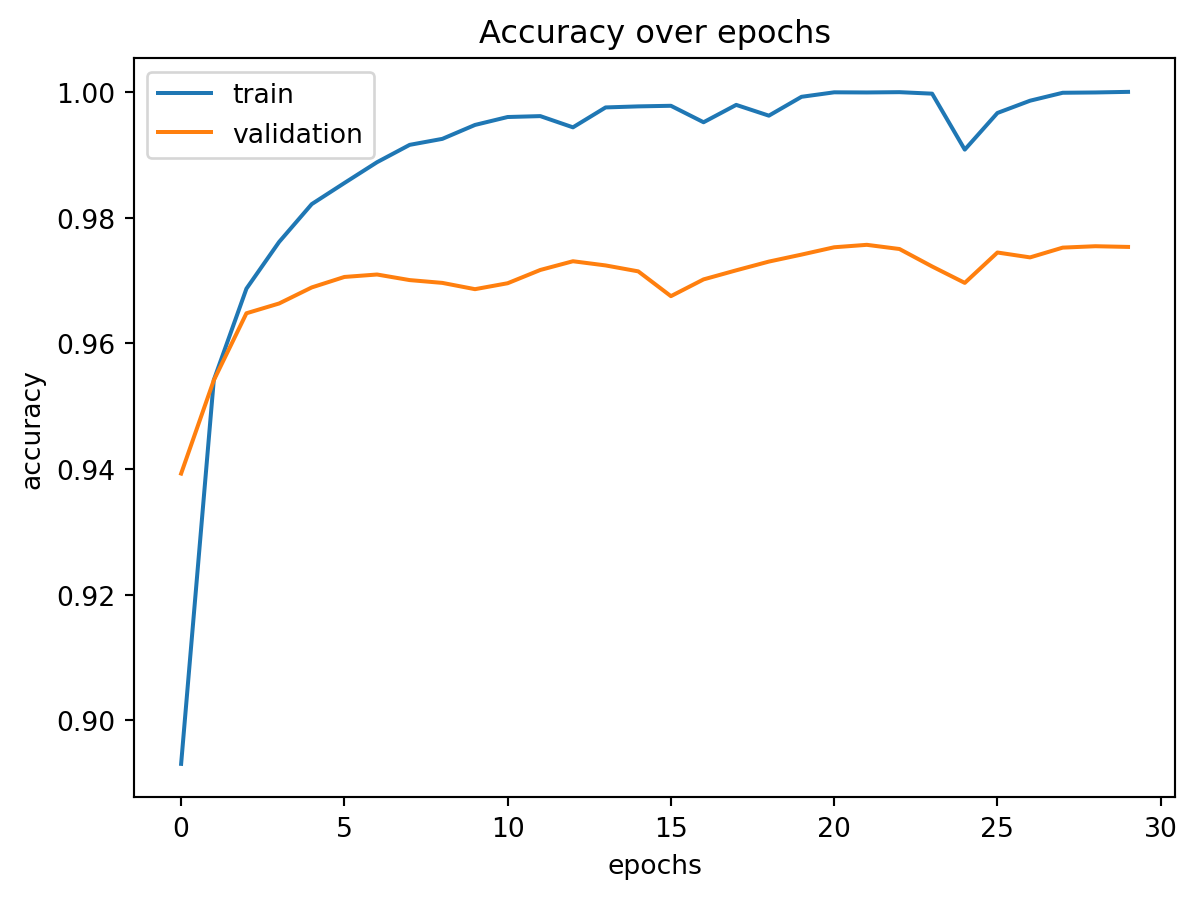

<Figure size 672x480 with 0 Axes>

In [8]:
fig, ax = plt.subplots()
ax.set_title('Accuracy over epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.plot(history.history['accuracy'], label='train')
ax.plot(history.history['val_accuracy'], label='validation')
ax.legend(loc='upper left')
plt.show()
plt.savefig('../figs/mnist_accuracy.png')

In [9]:
fashion = K.datasets.fashion_mnist
(x_train_mf, y_train_mf), (x_test_mf, y_test_mf) = fashion.load_data()
x_train_mf = x_train_mf / 255.0
x_test_mf = x_test_mf / 255.0
y_train_mf = K.utils.to_categorical(y_train_mf)
y_test_mf = K.utils.to_categorical(y_test_mf)

In [10]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

/home/iz/Dropbox/stuff/for-others/teaching/HFH/GKI/02-GKI-python/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model2.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [12]:
x_train_mf = x_train_mf.reshape(-1, 28, 28, 1)
x_test_mf = x_test_mf.reshape(-1, 28, 28, 1)

In [13]:
history = model2.fit(
    x_train_mf, y_train_mf,
    epochs=30,
    batch_size=128,
    validation_data=(x_test_mf, y_test_mf),
    verbose=2
)

Epoch 1/30


469/469 - 19s - 41ms/step - accuracy: 0.8284 - loss: 0.4894 - val_accuracy: 0.8710 - val_loss: 0.3737


Epoch 2/30


469/469 - 16s - 33ms/step - accuracy: 0.8854 - loss: 0.3270 - val_accuracy: 0.8832 - val_loss: 0.3235


Epoch 3/30


469/469 - 17s - 36ms/step - accuracy: 0.9009 - loss: 0.2823 - val_accuracy: 0.8924 - val_loss: 0.3015


Epoch 4/30


469/469 - 18s - 38ms/step - accuracy: 0.9088 - loss: 0.2529 - val_accuracy: 0.8984 - val_loss: 0.2760


Epoch 5/30


469/469 - 19s - 40ms/step - accuracy: 0.9194 - loss: 0.2265 - val_accuracy: 0.8992 - val_loss: 0.2768


Epoch 6/30


469/469 - 17s - 36ms/step - accuracy: 0.9259 - loss: 0.2079 - val_accuracy: 0.9057 - val_loss: 0.2635


Epoch 7/30


469/469 - 15s - 33ms/step - accuracy: 0.9319 - loss: 0.1879 - val_accuracy: 0.9049 - val_loss: 0.2594


Epoch 8/30


469/469 - 13s - 28ms/step - accuracy: 0.9373 - loss: 0.1745 - val_accuracy: 0.9078 - val_loss: 0.2559


Epoch 9/30


469/469 - 13s - 28ms/step - accuracy: 0.9430 - loss: 0.1595 - val_accuracy: 0.9084 - val_loss: 0.2672


Epoch 10/30


469/469 - 14s - 30ms/step - accuracy: 0.9473 - loss: 0.1467 - val_accuracy: 0.9094 - val_loss: 0.2639


Epoch 11/30


469/469 - 13s - 29ms/step - accuracy: 0.9523 - loss: 0.1335 - val_accuracy: 0.9128 - val_loss: 0.2567


Epoch 12/30


469/469 - 15s - 32ms/step - accuracy: 0.9569 - loss: 0.1220 - val_accuracy: 0.9143 - val_loss: 0.2635


Epoch 13/30


469/469 - 13s - 29ms/step - accuracy: 0.9597 - loss: 0.1133 - val_accuracy: 0.9160 - val_loss: 0.2685


Epoch 14/30


469/469 - 14s - 30ms/step - accuracy: 0.9643 - loss: 0.1011 - val_accuracy: 0.9144 - val_loss: 0.2765


Epoch 15/30


469/469 - 12s - 26ms/step - accuracy: 0.9675 - loss: 0.0920 - val_accuracy: 0.9175 - val_loss: 0.2783


Epoch 16/30


469/469 - 13s - 28ms/step - accuracy: 0.9711 - loss: 0.0841 - val_accuracy: 0.9164 - val_loss: 0.2914


Epoch 17/30


469/469 - 12s - 26ms/step - accuracy: 0.9748 - loss: 0.0749 - val_accuracy: 0.9131 - val_loss: 0.3076


Epoch 18/30


469/469 - 15s - 31ms/step - accuracy: 0.9764 - loss: 0.0683 - val_accuracy: 0.9125 - val_loss: 0.3168


Epoch 19/30


469/469 - 15s - 31ms/step - accuracy: 0.9780 - loss: 0.0630 - val_accuracy: 0.9171 - val_loss: 0.3109


Epoch 20/30


469/469 - 13s - 28ms/step - accuracy: 0.9813 - loss: 0.0551 - val_accuracy: 0.9140 - val_loss: 0.3357


Epoch 21/30


469/469 - 13s - 28ms/step - accuracy: 0.9835 - loss: 0.0504 - val_accuracy: 0.9171 - val_loss: 0.3370


Epoch 22/30


469/469 - 13s - 29ms/step - accuracy: 0.9857 - loss: 0.0439 - val_accuracy: 0.9098 - val_loss: 0.3776


Epoch 23/30


469/469 - 14s - 30ms/step - accuracy: 0.9855 - loss: 0.0422 - val_accuracy: 0.9162 - val_loss: 0.3657


Epoch 24/30


469/469 - 13s - 28ms/step - accuracy: 0.9884 - loss: 0.0354 - val_accuracy: 0.9145 - val_loss: 0.3799


Epoch 25/30


469/469 - 14s - 29ms/step - accuracy: 0.9896 - loss: 0.0322 - val_accuracy: 0.9169 - val_loss: 0.3951


Epoch 26/30


469/469 - 13s - 27ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9166 - val_loss: 0.3972


Epoch 27/30


469/469 - 16s - 34ms/step - accuracy: 0.9930 - loss: 0.0238 - val_accuracy: 0.9071 - val_loss: 0.4489


Epoch 28/30


469/469 - 12s - 25ms/step - accuracy: 0.9915 - loss: 0.0259 - val_accuracy: 0.9091 - val_loss: 0.4475


Epoch 29/30


469/469 - 14s - 30ms/step - accuracy: 0.9930 - loss: 0.0230 - val_accuracy: 0.9149 - val_loss: 0.4530


Epoch 30/30


469/469 - 14s - 30ms/step - accuracy: 0.9913 - loss: 0.0256 - val_accuracy: 0.9113 - val_loss: 0.4657


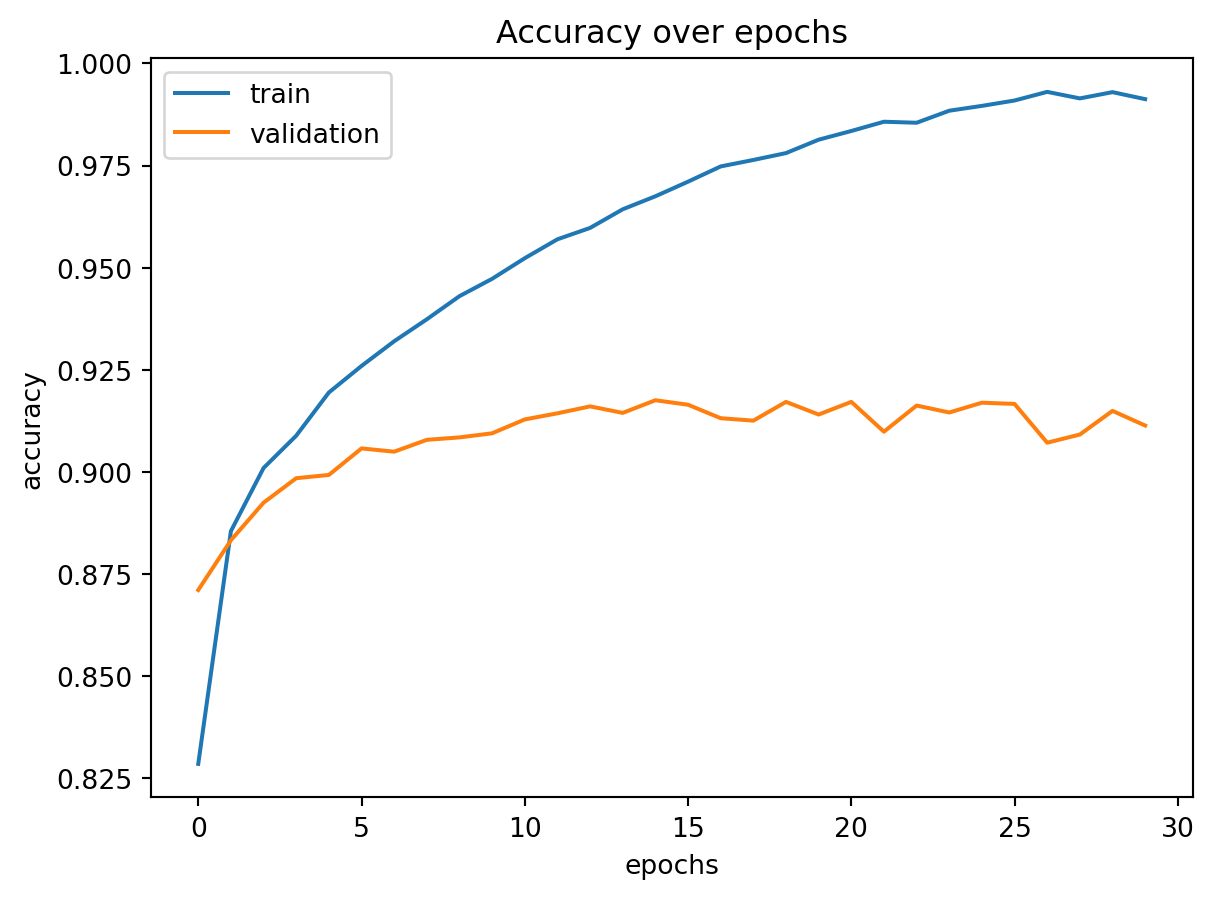

<Figure size 672x480 with 0 Axes>

In [14]:
fig, ax = plt.subplots()
ax.set_title('Accuracy over epochs')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.plot(history.history['accuracy'], label = 'train')
ax.plot(history.history['val_accuracy'], label = 'validation')
ax.legend(loc = 'upper left')
plt.show()
plt.savefig('../figs/mnist_accuracy_convolutional.png')

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1)) # 10 % der Neuronen werden zufällig deaktiviert
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))